# Real Data Science - Garbage in garbage out

While it is nice to be able to make accurate predictions using fancy machine learning techniques, this is only half the battle for practising data scientists and machine learning engineers. Most of the effort is spent obtaining, cleaning and preparing your datasets. Typically when learning new machine learning techniques we gloss over this part of the data processing pipeline. All to often we are given a perfect dataset with a known solution, very rarely do we apply our techniques to raw, messy data. To remedy that problem I am going to explicitly cover these overlooked aspects of machine learning in this notebook. From downloading a dataset to cleaning and reshaping it. I will also cover some options for building the entire data processing pipeline, all from within Python.

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

## Downloading a Dataset

Before we can do anything we first need to get our hands on some data. Any data! The best place to find free data is on the internet. There are many places to look. From CSIRO's [Data Access Portal](https://data.csiro.au) and [Kaggle Datasets](https://www.kaggle.com/datasets) to the [Australian Government data](http://data.gov.au/) and the [Bureau of Meteorology](http://www.bom.gov.au/climate/change/acorn-sat/#tabs=Data-and-networks). There is also some standard dataset repositories [UCI machine learning repository](http://archive.ics.uci.edu/ml/index.php), [machine learning dataset repository](http://mldata.org)

We are going to use some temperature data from Melbourne (you are more than welcome, and encouraged, to try and play with another dataset that interests you!).

In [2]:
MIN_DATA_URL = "http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.minT.087031.daily.txt"
MAX_DATA_URL = "http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.maxT.087031.daily.txt"

As with most tools in Python, there are a few options for downloading data. There is the in [urllib](https://docs.python.org/2/library/urllib.html) which can be cross-compatibly accessed using [six.moves](https://pythonhosted.org/six/#module-six.moves). There is also the much nicer [requests library](http://docs.python-requests.org/en/master/) which we will use in this notebook. 

If you need to scrape a webpage the [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/) library is fairly nice, or again if you are feeling adventurous there are some tools in the [Python standard library](https://docs.python.org/2/library/xml.etree.elementtree.html).

In [3]:
import requests

min_string_data = requests.get(MIN_DATA_URL).text
max_string_data = requests.get(MAX_DATA_URL).text

print(type(min_string_data))
print(min_string_data)

<class 'str'>
MIN TEMP   087031 19431002 20170228 missing_value=99999.9 LAVERTON RAAF                             
19431002     6.2
19431003     7.2
19431004     8.2
19431005     4.9
19431006     0.3
19431007     2.0
19431008     6.1
19431009     6.1
19431010     8.2
19431011     8.7
19431012     8.5
19431013     6.0
19431014     6.7
19431015     6.7
19431016    -0.1
19431017 99999.9
19431018     8.2
19431019     9.1
19431020     7.5
19431021     6.7
19431022     7.0
19431023    10.2
19431024    10.2
19431025     8.2
19431026     5.0
19431027     5.8
19431028     4.9
19431029    11.4
19431030     6.9
19431031     6.9
19431101 99999.9
19431102 99999.9
19431103 99999.9
19431104 99999.9
19431105 99999.9
19431106 99999.9
19431107 99999.9
19431108 99999.9
19431109 99999.9
19431110 99999.9
19431111 99999.9
19431112 99999.9
19431113 99999.9
19431114 99999.9
19431115 99999.9
19431116 99999.9
19431117 99999.9
19431118 99999.9
19431119 99999.9
19431120 99999.9
19431121 99999.9
19431122 99999.9
1

Well... that was easy. 

We have our datasets. The date is given in the first column while the temperature (in degrees celsius) is given in the second. You will also notice that there is a header with some extra info about the dataset. We have: 

    data name, station ID, date of first reading, date of last reading, missing value identifier, station location.

However, you will notice that our data is in a string (or `unicode`) object, which isn't all that useful when performing numerical analysis. One of the more common (or versatile) objects for data analysis is a [Pandas](http://pandas.pydata.org/) [`dataframe`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Pandas typically expects to read from a file directly, not from a string object. We can mimic file-like behaviour using the [StringIO](https://docs.python.org/3/library/io.html) class from the Python standard library.

In [4]:
from io import StringIO
import pandas as pd

# Make data appear file-like
min_data = StringIO(min_string_data)
max_data = StringIO(max_string_data)

# Import data into a Pandas dataframe
min_df = pd.read_csv(min_data,
                     delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                     names=["date", "min_temp"],  # Strings for our column headings
                     skiprows=1,                  # Skip the header row
                     parse_dates=[0])             # Parse the first column as a date type
max_df = pd.read_csv(max_data,
                     delim_whitespace=True,
                     names=["date", "max_temp"],
                     skiprows=1,
                     parse_dates=[0])

print(type(min_df['date'][0]))
print(type(min_df['min_temp'][0]))
print(min_df)

<class 'pandas.tslib.Timestamp'>
<class 'numpy.float64'>
            date  min_temp
0     1943-10-02       6.2
1     1943-10-03       7.2
2     1943-10-04       8.2
3     1943-10-05       4.9
4     1943-10-06       0.3
5     1943-10-07       2.0
6     1943-10-08       6.1
7     1943-10-09       6.1
8     1943-10-10       8.2
9     1943-10-11       8.7
10    1943-10-12       8.5
11    1943-10-13       6.0
12    1943-10-14       6.7
13    1943-10-15       6.7
14    1943-10-16      -0.1
15    1943-10-17   99999.9
16    1943-10-18       8.2
17    1943-10-19       9.1
18    1943-10-20       7.5
19    1943-10-21       6.7
20    1943-10-22       7.0
21    1943-10-23      10.2
22    1943-10-24      10.2
23    1943-10-25       8.2
24    1943-10-26       5.0
25    1943-10-27       5.8
26    1943-10-28       4.9
27    1943-10-29      11.4
28    1943-10-30       6.9
29    1943-10-31       6.9
...          ...       ...
26784 2017-01-30      15.4
26785 2017-01-31      15.8
26786 2017-02-01      13.

Our data is now in a neat and easily addressable format, ready to be used for solving the worlds problems... sort of.

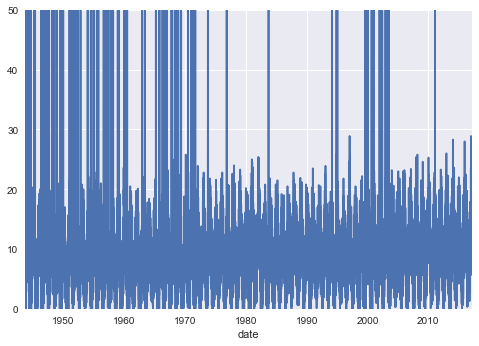

In [9]:
min_df.plot(x="date",
            y="min_temp",
            ylim=[0, 50],
            legend=False)
plt.show()

## Data Cleaning

Often raw data comes with missing or erroneous entries. We already saw in the data header above that missing enrties have been filled with '99999.9', sometimes datasets might use 'NaN', 'NA', 'null' or just empty whitespace. This will ultimately depend on how your dataset was created and cannot be predicted apriori. So you will need to inspect your dataset or the apropriate schema to identify the keyword you are looking for.

We can easily remove the rows, but depending on your application that might not be the best solution. Pandas dataframes also have an [`interpolate`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.interpolate.html) method that can interpolate missing data for you. I will show you both approaches here.

In [57]:
# Select rows where the temperature is not equal to 99999.9
min_removed_df = min_df.query('min_temp != 99999.9')
max_removed_df = max_df.query('max_temp != 99999.9')
print(min_df.size)
print(min_removed_df.size)
print(min_removed_df)

53628
52796
            date  min_temp
0     1943-10-02       6.2
1     1943-10-03       7.2
2     1943-10-04       8.2
3     1943-10-05       4.9
4     1943-10-06       0.3
5     1943-10-07       2.0
6     1943-10-08       6.1
7     1943-10-09       6.1
8     1943-10-10       8.2
9     1943-10-11       8.7
10    1943-10-12       8.5
11    1943-10-13       6.0
12    1943-10-14       6.7
13    1943-10-15       6.7
14    1943-10-16      -0.1
16    1943-10-18       8.2
17    1943-10-19       9.1
18    1943-10-20       7.5
19    1943-10-21       6.7
20    1943-10-22       7.0
21    1943-10-23      10.2
22    1943-10-24      10.2
23    1943-10-25       8.2
24    1943-10-26       5.0
25    1943-10-27       5.8
26    1943-10-28       4.9
27    1943-10-29      11.4
28    1943-10-30       6.9
29    1943-10-31       6.9
52    1943-11-23      10.4
...          ...       ...
26784 2017-01-30      15.4
26785 2017-01-31      15.8
26786 2017-02-01      13.3
26787 2017-02-02      11.4
26788 2017-02-03

Now let's look at interpolation. If we want to use the built Pandas method we need our NaNs to actually be NaNs. So let's first do that

In [10]:
import numpy as np

# Replace the missing values with Numpy NaNs
min_nan_df = min_df.replace(to_replace=99999.9,
                            value=np.nan)
max_nan_df = max_df.replace(to_replace=99999.9,
                            value=np.nan)

print(min_nan_df)

            date  min_temp
0     1943-10-02       6.2
1     1943-10-03       7.2
2     1943-10-04       8.2
3     1943-10-05       4.9
4     1943-10-06       0.3
5     1943-10-07       2.0
6     1943-10-08       6.1
7     1943-10-09       6.1
8     1943-10-10       8.2
9     1943-10-11       8.7
10    1943-10-12       8.5
11    1943-10-13       6.0
12    1943-10-14       6.7
13    1943-10-15       6.7
14    1943-10-16      -0.1
15    1943-10-17       NaN
16    1943-10-18       8.2
17    1943-10-19       9.1
18    1943-10-20       7.5
19    1943-10-21       6.7
20    1943-10-22       7.0
21    1943-10-23      10.2
22    1943-10-24      10.2
23    1943-10-25       8.2
24    1943-10-26       5.0
25    1943-10-27       5.8
26    1943-10-28       4.9
27    1943-10-29      11.4
28    1943-10-30       6.9
29    1943-10-31       6.9
...          ...       ...
26784 2017-01-30      15.4
26785 2017-01-31      15.8
26786 2017-02-01      13.3
26787 2017-02-02      11.4
26788 2017-02-03      14.0
2

In [11]:
min_interpolated_df = min_nan_df.interpolate()
max_interpolated_df = max_nan_df.interpolate()

print(min_interpolated_df)

            date  min_temp
0     1943-10-02      6.20
1     1943-10-03      7.20
2     1943-10-04      8.20
3     1943-10-05      4.90
4     1943-10-06      0.30
5     1943-10-07      2.00
6     1943-10-08      6.10
7     1943-10-09      6.10
8     1943-10-10      8.20
9     1943-10-11      8.70
10    1943-10-12      8.50
11    1943-10-13      6.00
12    1943-10-14      6.70
13    1943-10-15      6.70
14    1943-10-16     -0.10
15    1943-10-17      4.05
16    1943-10-18      8.20
17    1943-10-19      9.10
18    1943-10-20      7.50
19    1943-10-21      6.70
20    1943-10-22      7.00
21    1943-10-23     10.20
22    1943-10-24     10.20
23    1943-10-25      8.20
24    1943-10-26      5.00
25    1943-10-27      5.80
26    1943-10-28      4.90
27    1943-10-29     11.40
28    1943-10-30      6.90
29    1943-10-31      6.90
...          ...       ...
26784 2017-01-30     15.40
26785 2017-01-31     15.80
26786 2017-02-01     13.30
26787 2017-02-02     11.40
26788 2017-02-03     14.00
2

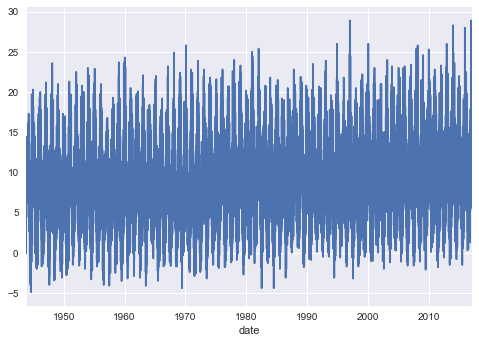

In [14]:
min_interpolated_df.plot(x="date",
                         y="min_temp",
                         legend=False)
plt.show()

**Challenge -** The Pandas dataframe class also has a [dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) method. Maybe you could try to remove the NaNs using this method instead of the indexing technique we used above.

Depending on what you intend to do with your data you may also need to remove any outliers. Looking at our data above it seems that we probably don't have that problem, however I will show you how it is done should you need to in the future.

In [15]:
min_temp_min = min_interpolated_df['min_temp'].min()
min_temp_mean = min_interpolated_df['min_temp'].mean()
min_temp_max = min_interpolated_df['min_temp'].max()
min_temp_std = min_interpolated_df['min_temp'].std()

print("The statistical properties for our minimum temperature time series are:")
print("    - min  = {: 4.2f}".format(min_temp_min))
print("    - mean = {: 4.2f}".format(min_temp_mean))
print("    - max  = {: 4.2f}".format(min_temp_max))
print("    - std  = {: 4.2f}".format(min_temp_std))

The statistical properties for our minimum temperature time series are:
    - min  = -4.90
    - mean =  8.97
    - max  =  28.90
    - std  =  4.60


In [16]:
from scipy import stats
min_temp_no_outliers_df = min_interpolated_df[np.abs(stats.zscore(min_interpolated_df["min_temp"])) < 3]
print(len(min_temp_no_outliers_df))
print(len(min_interpolated_df))

26752
26814


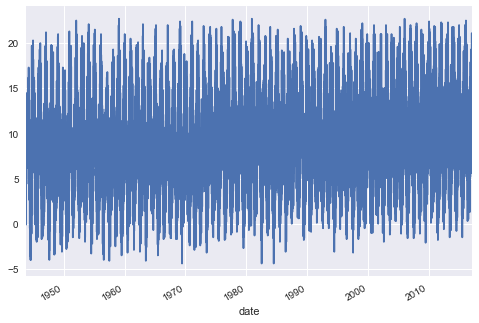

In [17]:
min_temp_no_outliers_df.plot(x="date",
                         y="min_temp",
                         legend=False)
plt.show()

**Challenge -** It is breifly covered in the unsupervised learning notebook, but [Scikit-Learn](http://scikit-learn.org/stable/) has some [novelty and outlier detection](http://scikit-learn.org/stable/modules/outlier_detection.html) methods that can be used to clean your too. Perhaps you might try applying one of those?

## Scaling Data

Many machine learning algorithms perform better when the input data lies in a given range, typically $[0,1]$ or $[-1,1]$. More specifically algorithms are often built on the assumption that the input distribution is normal, that it has a zero mean, $\mu=0$, and unit variance, $\sigma^2=1$. Furthermore when combining features of different scales it is usually beneficial to normalise features so that they are comparable. In our example our two features probably aren't too different so it might be okay, but consider what might happen if we also wanted to include the local air pressure (which is in the range of 1000's of Pa) or humidity (maybe expressed as a fraction, $[0,1]$).

There are two common approaches to scaling data (although there are many more) and which one you choose will depend on your dataset and the machine learning algorithm you have in mind. The first is *min-max* scaling. This works just as it sounds, you simply subtract the minimum value and divide by the range (which is given by the max - min):

$$ \tilde{X}_{\text{min-max}} = \frac{X - \min(x)}{\max(X) - \min(X)} $$

Min-max scaling will transform your distribution such that it lies within the unit interval, $[0,1]$, however it is susceptible to outliers as they can obviously skew the $\min$ and $\max$ statistics.

The second scaling method is *standardisation* (sometimes confusingly called *normalisation*). This is where data is transformed by first subtracting the mean, then dividing by the variance:

$$ \tilde{X}_{\text{standardisation}} = \frac{X - \mu}{\sigma^2} $$

Standardisation is less susceptible to outliers than min-max scaling, although there is still some vulnerability there. The main difference is that it will not clamp that range to specified values. It will simply centralise the mean and ensure there is unit variance.

Fortunately there are some built in functions in [Scikit-Learn](http://scikit-learn.org/stable/) that will do all the heavy lifting for us. Let's start off the the [`minmax_scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) function. Can you guess which scaling algorithm it applies?

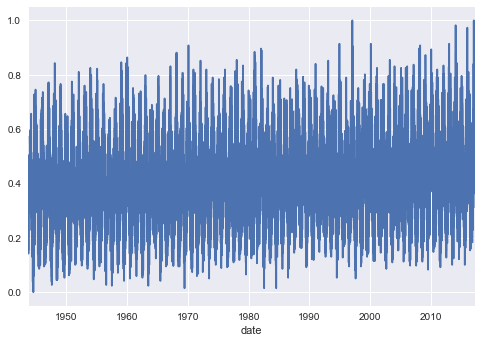

In [18]:
from sklearn.preprocessing import minmax_scale

min_temp_min_max_scaled_df = min_interpolated_df.copy()

min_temp_min_max_scaled_df["min_temp"] = minmax_scale(min_interpolated_df["min_temp"])

min_temp_min_max_scaled_df.plot(x="date",
                                y="min_temp",
                                legend=False)
plt.show()

Scitkit-Learn also has a nice function for standardisation, called simply [`scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale).

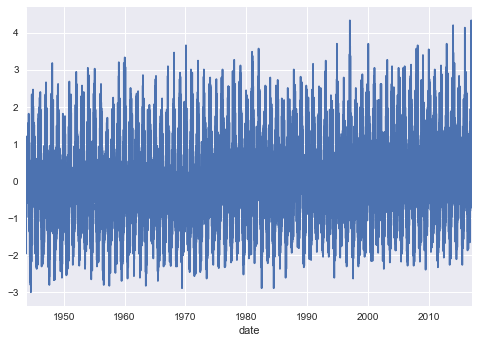

In [19]:
from sklearn.preprocessing import scale

min_temp_standardised_df = min_interpolated_df.copy()

min_temp_standardised_df["min_temp"] = scale(min_temp_standardised_df["min_temp"])

min_temp_standardised_df.plot(x="date",
                                y="min_temp",
                                legend=False)
plt.show()

Notice the different ranges for the two different scaling methods, also notice the different mean values for each. We mentioned before that both of these methods may not be suitable when there are outliers in your data. Scikit-Learn also has a [`robust_scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale) function that might be more appropriate in these circumstances. 

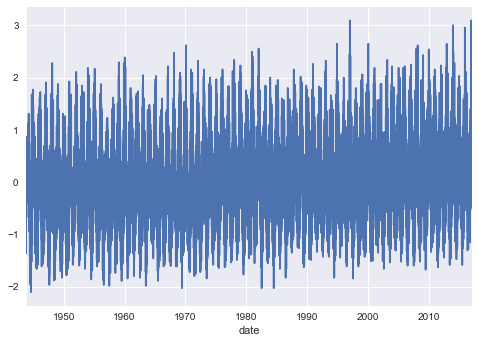

In [24]:
from sklearn.preprocessing import robust_scale

min_temp_robust_scale_df = min_interpolated_df.copy()

min_temp_robust_scale_df["min_temp"] = robust_scale(min_temp_robust_scale_df["min_temp"].values.reshape(-1, 1))

min_temp_robust_scale_df.plot(x="date",
                              y="min_temp",
                              legend=False)
plt.show()

## Reshaping

Hooray!!! Our data is cleaned and scaled, ready for training some advanced machine learning algorithms. Right?

**Wrong**. Depending on the machine learning algorithm you are applying and the particular machine learning framework you are developing with you will still need to munge and reshape your data such that it fits the expect input shape. Say, for example we needed to have our two seperate features combine into a single vector.

In [31]:
max_temp_robust_scale_df = max_interpolated_df.copy()

max_temp_robust_scale_df["max_temp"] = robust_scale(max_temp_robust_scale_df["max_temp"].values.reshape(-1, 1))

In [33]:
combined_temp_df = min_temp_robust_scale_df.merge(max_temp_robust_scale_df,
                                                  on="date",
                                                  how="inner",
                                                 )
print(combined_temp_df)

            date  min_temp  max_temp
0     1943-10-02 -0.400000 -0.315789
1     1943-10-03 -0.246154 -0.315789
2     1943-10-04 -0.092308  0.684211
3     1943-10-05 -0.600000  0.131579
4     1943-10-06 -1.307692 -0.486842
5     1943-10-07 -1.046154 -0.381579
6     1943-10-08 -0.415385 -0.368421
7     1943-10-09 -0.415385 -0.644737
8     1943-10-10 -0.092308 -0.078947
9     1943-10-11 -0.015385 -0.565789
10    1943-10-12 -0.046154 -0.578947
11    1943-10-13 -0.430769 -0.473684
12    1943-10-14 -0.323077 -0.328947
13    1943-10-15 -0.323077 -0.355263
14    1943-10-16 -1.369231  0.157895
15    1943-10-17 -0.730769  0.368421
16    1943-10-18 -0.092308  0.342105
17    1943-10-19  0.046154 -0.065789
18    1943-10-20 -0.200000 -0.328947
19    1943-10-21 -0.323077 -0.039474
20    1943-10-22 -0.276923  0.013158
21    1943-10-23  0.215385  0.131579
22    1943-10-24  0.215385 -0.250000
23    1943-10-25 -0.092308 -0.263158
24    1943-10-26 -0.584615 -0.552632
25    1943-10-27 -0.461538 -0.381579
2

Sometimes its nicer to set the index to something useful as well. We can use the date as a unqiue index for each data point

In [34]:
combined_temp_df.set_index("date",
                           inplace=True,
                          )
print(combined_temp_df)

            min_temp  max_temp
date                          
1943-10-02 -0.400000 -0.315789
1943-10-03 -0.246154 -0.315789
1943-10-04 -0.092308  0.684211
1943-10-05 -0.600000  0.131579
1943-10-06 -1.307692 -0.486842
1943-10-07 -1.046154 -0.381579
1943-10-08 -0.415385 -0.368421
1943-10-09 -0.415385 -0.644737
1943-10-10 -0.092308 -0.078947
1943-10-11 -0.015385 -0.565789
1943-10-12 -0.046154 -0.578947
1943-10-13 -0.430769 -0.473684
1943-10-14 -0.323077 -0.328947
1943-10-15 -0.323077 -0.355263
1943-10-16 -1.369231  0.157895
1943-10-17 -0.730769  0.368421
1943-10-18 -0.092308  0.342105
1943-10-19  0.046154 -0.065789
1943-10-20 -0.200000 -0.328947
1943-10-21 -0.323077 -0.039474
1943-10-22 -0.276923  0.013158
1943-10-23  0.215385  0.131579
1943-10-24  0.215385 -0.250000
1943-10-25 -0.092308 -0.263158
1943-10-26 -0.584615 -0.552632
1943-10-27 -0.461538 -0.381579
1943-10-28 -0.600000 -0.197368
1943-10-29  0.400000  1.000000
1943-10-30 -0.292308  0.750000
1943-10-31 -0.292308 -0.171053
...     

## Pipelining - Luigi

[Luigi](https://luigi.readthedocs.io/en/latest/) is a data processing pipeline tool developed by spotify to handle there day to day data mining tasks. It is designed to, "handle dependency resolution, workflow management, visualization, handling failures, command line integration, and much more." 

In [1]:
import luigi

Luigi operates as a command line tool, so we can't enter code directly into a Jupyter notebook. Instead I have input the below code into a file `luigi_pipeline.py` that we can run using the bash magic command.

```python
import luigi
import requests

import numpy as np
import pandas as pd

from sklearn.preprocessing import robust_scale

MIN_DATA_URL = "http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.minT.087031.daily.txt"
MAX_DATA_URL = "http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.maxT.087031.daily.txt"

class DownloadMinTemperatures(luigi.Task):
    def requires(self):
        return []
 
    def output(self):
        return luigi.LocalTarget("min_temps.csv")
 
    def run(self):
        min_string_data = requests.get(MIN_DATA_URL).text
        min_list_data = min_string_data.split("\n")

        with self.output().open('w') as out_file:
            for min_temp in min_list_data:
                out_line = min_temp
                out_file.write((out_line + '\n'))

class ImportMinTemperatures(luigi.Task):
    def requires(self):
        return [DownloadMinTemperatures()]
 
    def output(self):
        return luigi.LocalTarget("min_temps.df")
 
    def run(self):
        min_df = pd.read_csv(self.input()[0].open(),
                             delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                             names=["date", "min_temp"],  # Strings for our column headings
                             skiprows=1,                  # Skip the header row
                             parse_dates=[0])             # Parse the first column as a date type

        with self.output().open('w') as min_file:
            min_df.to_csv(min_file,
                          sep='\t',
                          encoding='utf-8',
                          index=None)

class RemoveMinTempNaNs(luigi.Task):
    def requires(self):
        return [ImportMinTemperatures()]
 
    def output(self):
        return luigi.LocalTarget("clean_min_temps.df")
 
    def run(self):
        min_df = pd.read_csv(self.input()[0].open(),
                             delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                             names=["date", "min_temp"],  # Strings for our column headings
                             skiprows=1,                  # Skip the header row
                             parse_dates=[0])             # Parse the first column as a date type

        # Replace the missing values with Numpy NaNs
        min_nan_df = min_df.replace(to_replace=99999.9,
                                    value=np.nan)
        min_interpolated_df = min_nan_df.interpolate()

        with self.output().open('w') as min_file:
            min_interpolated_df.to_csv(min_file,
                                       sep='\t',
                                       encoding='utf-8',
                                       index=None)

class StandardiseMinTemps(luigi.Task):
    def requires(self):
        return [RemoveMinTempNaNs()]
 
    def output(self):
        return luigi.LocalTarget("normalised_min_temps.df")
 
    def run(self):
        min_df = pd.read_csv(self.input()[0].open(),
                             delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                             names=["date", "min_temp"],  # Strings for our column headings
                             skiprows=1,                  # Skip the header row
                             parse_dates=[0])             # Parse the first column as a date type

        min_df["min_temp"] = robust_scale(min_df["min_temp"])

        with self.output().open('w') as min_file:
            min_df.to_csv(min_file,
                          sep='\t',
                          encoding='utf-8',
                          index=None)

class DownloadMaxTemperatures(luigi.Task):
    def requires(self):
        return []
 
    def output(self):
        return luigi.LocalTarget("max_temps.csv")
 
    def run(self):
        max_string_data = requests.get(MAX_DATA_URL).text
        max_list_data = max_string_data.split("\n")

        with self.output().open('w') as out_file:
            for max_temp in max_list_data:
                out_line = max_temp
                out_file.write((out_line + '\n'))

class ImportMaxTemperatures(luigi.Task):
    def requires(self):
        return [DownloadMaxTemperatures()]
 
    def output(self):
        return luigi.LocalTarget("max_temps.df")
 
    def run(self):
        max_df = pd.read_csv(self.input()[0].open(),
                             delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                             names=["date", "max_temp"],  # Strings for our column headings
                             skiprows=1,                  # Skip the header row
                             parse_dates=[0])             # Parse the first column as a date type

        with self.output().open('w') as max_file:
            max_df.to_csv(max_file,
                          sep='\t',
                          encoding='utf-8',
                          index=None)

class RemoveMaxTempNaNs(luigi.Task):
    def requires(self):
        return [ImportMaxTemperatures()]
 
    def output(self):
        return luigi.LocalTarget("clean_max_temps.df")
 
    def run(self):
        max_df = pd.read_csv(self.input()[0].open(),
                             delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                             names=["date", "max_temp"],  # Strings for our column headings
                             skiprows=1,                  # Skip the header row
                             parse_dates=[0])             # Parse the first column as a date type

        # Replace the missing values with Numpy NaNs
        max_nan_df = max_df.replace(to_replace=99999.9,
                                    value=np.nan)
        max_interpolated_df = max_nan_df.interpolate()

        with self.output().open('w') as max_file:
            max_interpolated_df.to_csv(max_file,
                                       sep='\t',
                                       encoding='utf-8',
                                       index=None)

class StandardiseMaxTemps(luigi.Task):
    def requires(self):
        return [RemoveMaxTempNaNs()]
 
    def output(self):
        return luigi.LocalTarget("normalised_max_temps.df")
 
    def run(self):
        max_df = pd.read_csv(self.input()[0].open(),
                             delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                             names=["date", "max_temp"],  # Strings for our column headings
                             skiprows=1,                  # Skip the header row
                             parse_dates=[0])             # Parse the first column as a date type

        max_df["max_temp"] = robust_scale(max_df["max_temp"])

        with self.output().open('w') as max_file:
            max_df.to_csv(max_file,
                          sep='\t',
                          encoding='utf-8',
                          index=None)

class CombineTemps(luigi.Task):
    def requires(self):
        return [StandardiseMinTemps(), StandardiseMaxTemps()]
 
    def output(self):
        return luigi.LocalTarget("comnined_temps.df")
 
    def run(self):
        min_df = pd.read_csv(self.input()[0].open(),
                             delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                             names=["date", "max_temp"],  # Strings for our column headings
                             skiprows=1,                  # Skip the header row
                             parse_dates=[0])             # Parse the first column as a date type
        max_df = pd.read_csv(self.input()[1].open(),
                             delim_whitespace=True,       # Let Pandas know that white space is our delimiter
                             names=["date", "max_temp"],  # Strings for our column headings
                             skiprows=1,                  # Skip the header row
                             parse_dates=[0])             # Parse the first column as a date type

        combined_temp_df = min_df.merge(max_df,
                                        on="date",
                                        how="inner",
                                       )
        combined_temp_df.set_index("date",
                           inplace=True,
                          )

        with self.output().open('w') as combined_file:
            combined_temp_df.to_csv(combined_file,
                                    sep='\t',
                                    encoding='utf-8',
                                    index=None)

if __name__ == '__main__':
    luigi.run()
```

In [39]:
!python -m luigi --module luigi_pipeline CombineTemps --local-scheduler

DEBUG: Checking if CombineTemps() is complete
INFO: Informed scheduler that task   CombineTemps__99914b932b   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 1 processes
DEBUG: Asking scheduler for work...
DEBUG: Done
DEBUG: There are no more tasks to run at this time
INFO: Worker Worker(salt=838770467, workers=1, host=viki.BigPond, username=chris, pid=26550) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 present dependencies were encountered:
    - 1 CombineTemps()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing external dependencies

===== Luigi Execution Summary =====



## Pipelining - Scikit-Learn 

Many of the preprocessing functions we have been using from scikit-learn can also be stringed together using scikit-learns [pipeline](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) tools.